<a href="https://colab.research.google.com/github/Mrinalkumar1/Mumbai-Rent-prediction/blob/main/Mumbai_rent_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here we have a dataset of Mumbai's rental flat and what we are going to do is analyze the dataset and try to come up with a prediction algorithm which will help us to predict the price of the flat when we input all the columns which make a difference to price of the flat. **

https://www.kaggle.com/sufyanpatel/data-science-regression-project

In [211]:
import warnings
warnings.filterwarnings('ignore')

In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [213]:
df = pd.read_csv("/content/drive/MyDrive/ML Projects /Mumbai flats rent/prop_data_clean.csv")

In [214]:
df.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,floor_num,furnishing,id,id_string,latitude,locality,longitude,post_date,poster_name,price,project,title,trans,type,url,user_type
0,350.0,2.0,1,Mumbai,"2 Bath,Unfurnished,East facing The project has...",NaN,NaN,NaN,Unfurnished,45349857,domcache_srp_45349857,19.201336,Malad West,72.825882,2020-01-11,Saurabh Patil,9000,NaN,1 BHK Apartment for Rent in Malad West,Rent,Apartment,/propertyDetails/1-BHK-350-Sq-ft-Multistorey-A...,Agent
1,652.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,NaN,NaN,Semi-Furnished,45960973,domcache_srp_45960973,19.410704,Vasai,72.833592,2020-01-11,Gorakh Chavan,8060,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,635.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,7.0,4.0,Semi-Furnished,46688849,domcache_srp_46688849,19.467032,Virar,72.801612,2019-12-13,Lokesh Joshi,8000,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
3,540.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing Essential Se...",NaN,NaN,NaN,Semi-Furnished,44696119,domcache_srp_44696119,19.407257,Vasai East,72.836006,2020-01-13,Sajith Thomas,8000,NaN,1 BHK Apartment for Rent in Vasai East,Rent,Apartment,/propertyDetails/1-BHK-540-Sq-ft-Multistorey-A...,Agent
4,625.0,1.0,1,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,7.0,2.0,Furnished,46742851,domcache_srp_46742851,19.360215,Naigaon East,72.850167,2019-12-17,Charmaine Gomez,9000,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner


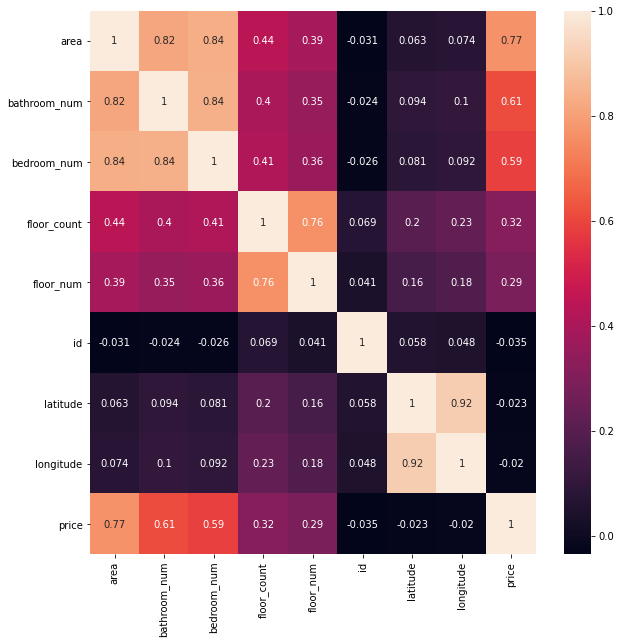

In [215]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

I went with df.corr in the very starting in order to see what columns I am supposed to get rid of. As we can see here "id", "latitude", "longitude" columns have very low correlation so we can just get rid of these columns in the very beginnng. 

In [216]:
df.columns

Index(['area', 'bathroom_num', 'bedroom_num', 'city', 'desc', 'dev_name',
       'floor_count', 'floor_num', 'furnishing', 'id', 'id_string', 'latitude',
       'locality', 'longitude', 'post_date', 'poster_name', 'price', 'project',
       'title', 'trans', 'type', 'url', 'user_type'],
      dtype='object')

In [217]:
df.count().sum()

752126

In [218]:
print("total number of rows: ",len(df))
print("\n")
print("Number of null rows\n",df.isnull().sum())

total number of rows:  34348


Number of null rows
 area              776
bathroom_num       14
bedroom_num         0
city                0
desc               10
dev_name        16999
floor_count      2860
floor_num        2781
furnishing         10
id                  0
id_string           0
latitude            0
locality          208
longitude           0
post_date           0
poster_name         1
price               0
project         14169
title              10
trans              30
type                0
url                10
user_type           0
dtype: int64


In [219]:
df.drop(['city','desc','dev_name','floor_count', 'floor_num', 'id', 'id_string','post_date', 'poster_name','project','title', 'trans', 'type', 'url', 'latitude','longitude'],axis=1,inplace=True)
#Dropping columns with low corr. 

In [220]:
df.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner


In [221]:
df.shape

(34348, 7)

In [222]:
df.isnull().sum()

area            776
bathroom_num     14
bedroom_num       0
furnishing       10
locality        208
price             0
user_type         0
dtype: int64

In [223]:
for col in df:
  print(col, df[col].unique())

area [350. 652. 635. ... 150. 663. 642.]
bathroom_num [ 2.  1. nan  3.  4.  5.  6.  7.  8.]
bedroom_num [1 4 3 5 2]
furnishing ['Unfurnished' 'Semi-Furnished' 'Furnished' nan]
locality ['Malad West' 'Vasai' 'Virar' 'Vasai East' 'Naigaon East' 'Virar West'
 'Royal Palms Estate' 'Nalasopara' 'Silver Park' 'Vasai West'
 'Andheri East' 'Mulund East' 'Malvani' 'Nalasopara East' nan
 'Balkum Pada - Majiwada' 'Kalyan' 'Bhayandar East' 'Mira Bhayandar'
 'MHADA Colony' 'Chembur Camp' 'Govind Nagar' 'Bhayandar West'
 'Beverly Park' 'Worli' 'Nalasopara West' 'Lok Manya Nagar'
 'Borivali West' 'Viva College Road' 'Mira Road' 'New Link Road'
 'Bhandup Industrial Estate' 'Sakinaka' 'Dongri' 'MMRDA Area'
 'Yashavant Nagar' 'Kandivali East' 'Ghatkopar West' 'Ghodbunder'
 'Nahur West' 'CAMA Industrial Estate' 'Anushakti Colony' 'Thane'
 'Yari Road' 'Virar East' 'Goregaon East' 'Sakinaka Junction' 'Prabhadevi'
 'Andheri West' 'Pandurang Wadi' 'Bandra West' 'Khar West' 'Bolinj'
 'Virat Nagar' 'Thane-Kaly

In [224]:
df.dropna(axis=0,how='any',inplace=True)  # After going through this case study multiple times I realized it's better to just drop all the nan values. 

In [225]:
df['price_per_sqft'] = df['price']/df['area']

In [226]:
location = df['locality'].value_counts()
location

Powai                       1453
Chembur                     1400
Andheri West                1359
Andheri East                1092
Worli                       1006
                            ... 
Rebello Rd                     1
Kashinath Ghanekar Chowk       1
Vivekanand Colony              1
Nehru Nagar-Kurla              1
VSNL Colony                    1
Name: locality, Length: 821, dtype: int64

In [227]:
df['price_per_sqft'].describe()

count    33346.000000
mean        58.737641
std        154.744405
min          2.812500
25%         38.095238
50%         49.404753
75%         68.000000
max      20000.000000
Name: price_per_sqft, dtype: float64

In [228]:
from scipy.stats import skew

print("Checking the distribution of data in every column")
df1 = df.select_dtypes(['int64','float64'])
for col in df1:
  print(col)  
  print("Skew: ",skew(df1[col]))
  #sns.histplot(df_num[col])
  print("----"*5)

Checking the distribution of data in every column
area
Skew:  2.296937398117015
--------------------
bathroom_num
Skew:  1.0447169167869068
--------------------
bedroom_num
Skew:  0.46325102765155224
--------------------
price
Skew:  4.591733014399967
--------------------
price_per_sqft
Skew:  93.34673822192995
--------------------


AS we can notice that our skew is pretty high for area, bathroom_num, floor_count, floor_num so we are going to try to work on this. 

Skewness should always be in the range of -0.5 to +0.5 

In [229]:
df['area'] = np.log(df['area'])
skew(df['area'])

0.018269342126933787

In [230]:
df['bathroom_num'] = np.sqrt(df['bathroom_num'])
skew(df['bathroom_num'])

0.3564901975363653

In [231]:
df['bedroom_num'].value_counts()

2    13127
1     9803
3     8351
4     1902
5      163
Name: bedroom_num, dtype: int64

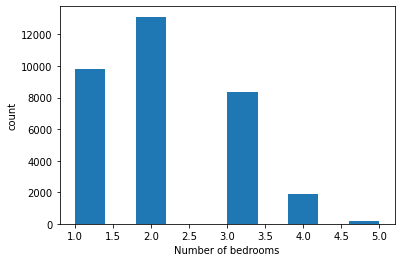

In [232]:
plt.hist(df['bedroom_num'])
plt.xlabel('Number of bedrooms')
plt.ylabel('count')
plt.show()

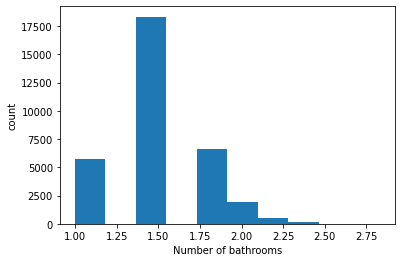

In [233]:
plt.hist(df['bathroom_num'], density=False, histtype='stepfilled')
plt.xlabel('Number of bathrooms')
plt.ylabel('count')
plt.show()

In [234]:
df.corr()

,area,bathroom_num,bedroom_num,price,price_per_sqft
area,1.000000,0.813823,0.881032,0.648539,-0.062136
bathroom_num,0.813823,1.000000,0.838404,0.579338,0.048114
bedroom_num,0.881032,0.838404,1.000000,0.590673,0.049941
price,0.648539,0.579338,0.590673,1.000000,0.162955
price_per_sqft,-0.062136,0.048114,0.049941,0.162955,1.000000


In [235]:
#df_new = pd.concat([df_num,df_cat],axis=1)

In [236]:
df.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,5.857933,1.414214,1,Unfurnished,Malad West,9000,Agent,25.714286
1,6.480045,1.414214,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,6.453625,1.414214,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,6.291569,1.414214,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,6.437752,1.000000,1,Furnished,Naigaon East,9000,Owner,14.400000


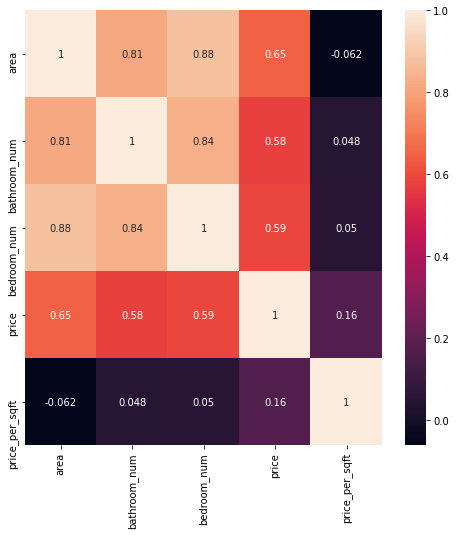

In [237]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

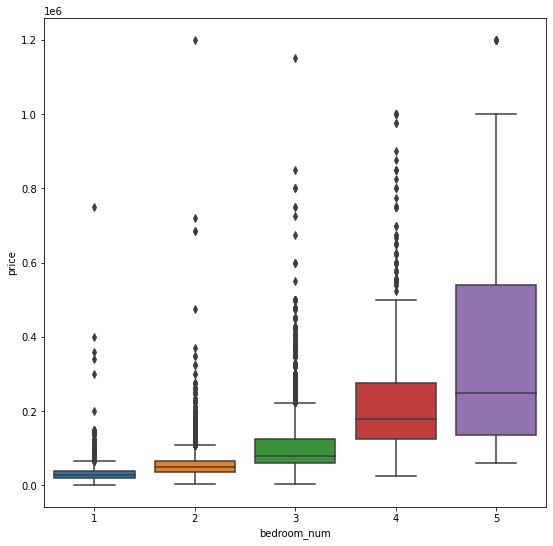

In [238]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df, x='bedroom_num',y='price',orient="v")
plt.show()

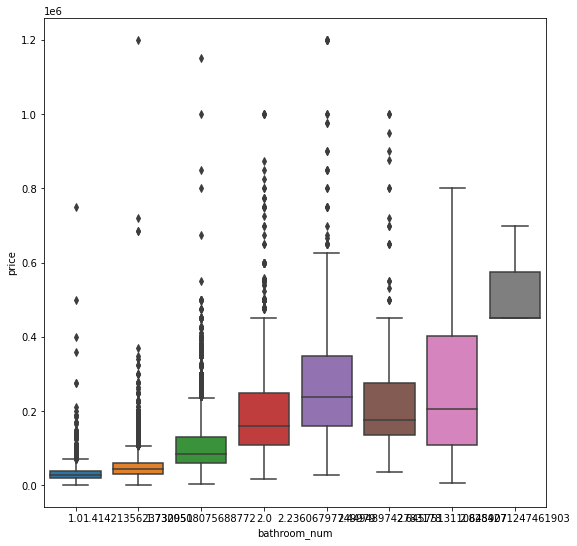

In [239]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df, x='bathroom_num',y='price',orient="v")
plt.show()

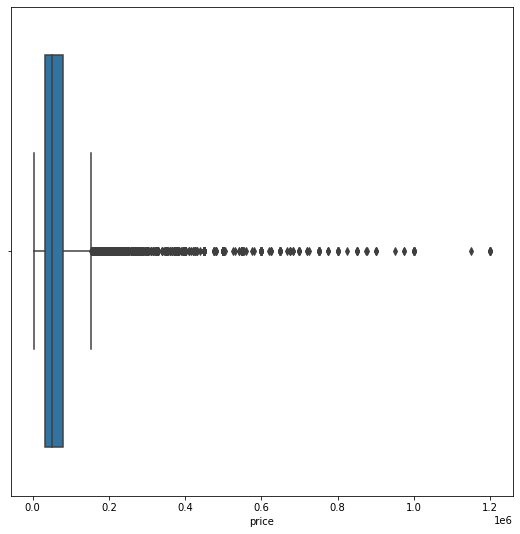

In [240]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df, x='price', linewidth=1.5)
plt.show()

In [241]:
# To find outliers

q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
IQR = q3-q1
Upper_range = q3 + IQR*1.5
print(q1, q3)
print(Upper_range)
print(len(df))

32000.0 80000.0
152000.0
33346


In [242]:
df[df['price'] > Upper_range]

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
980,7.649693,2.000000,4,Furnished,Andheri West,155000,Agent,73.809524
1030,7.783224,2.236068,4,Semi-Furnished,New Link Road,155000,Agent,64.583333
1075,8.160518,2.236068,4,Unfurnished,Wadala East,155000,Agent,44.285714
1088,7.843849,2.000000,4,Furnished,Andheri West,155000,Agent,60.784314
1140,7.962067,2.000000,4,Semi-Furnished,Vikhroli,155000,Agent,54.006969
...,...,...,...,...,...,...,...,...
34098,7.824046,1.732051,3,Semi-Furnished,Bandra Band Stand,675000,Agent,270.000000
34099,8.294050,2.000000,3,Semi-Furnished,Bandra West,725000,Agent,181.250000
34100,8.517193,2.000000,3,Furnished,Mount Mary,750000,Agent,150.000000
34101,8.517193,2.000000,3,Furnished,Bandra West,750000,Agent,150.000000


In [243]:
df3 = df[df['price'] < Upper_range]
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,5.857933,1.414214,1,Unfurnished,Malad West,9000,Agent,25.714286
1,6.480045,1.414214,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,6.453625,1.414214,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,6.291569,1.414214,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,6.437752,1.000000,1,Furnished,Naigaon East,9000,Owner,14.400000


In [244]:
df3.drop(['price_per_sqft','user_type'],axis=1, inplace=True)
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
0,5.857933,1.414214,1,Unfurnished,Malad West,9000
1,6.480045,1.414214,1,Semi-Furnished,Vasai,8060
2,6.453625,1.414214,1,Semi-Furnished,Virar,8000
3,6.291569,1.414214,1,Semi-Furnished,Vasai East,8000
4,6.437752,1.000000,1,Furnished,Naigaon East,9000


In [245]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['furnishing'] = le.fit_transform(df3['furnishing'])
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
0,5.857933,1.414214,1,2,Malad West,9000
1,6.480045,1.414214,1,1,Vasai,8060
2,6.453625,1.414214,1,1,Virar,8000
3,6.291569,1.414214,1,1,Vasai East,8000
4,6.437752,1.000000,1,0,Naigaon East,9000


In [246]:
df3.isnull().sum()

area            0
bathroom_num    0
bedroom_num     0
furnishing      0
locality        0
price           0
dtype: int64

In [247]:
dummies = pd.get_dummies(df['locality'])
dummies.head()

,4 Bunglows,AAI Residential Complex,Aarey Milk Colony,Abhinav Nagar,Abhishek Nagar,Abhyudaya Nagar,Acharya A Maharaj Chowk,Acharya Nagar,Acharya Tulsi Chowk,Adarsh Nagar,Adv RD Kowte Chowk,Advocate Devarshi N Khuman Chowk,Agari Pada,Agarkar Chowk,Agripada,Ahimsa Nagar,Air India Colony,Air India Staff Colony 2,Aksa Gaon,Akurli Nagar,Alika Nagar,Altamount Road,Amar Mahal Junction,Amar Nagar,Ambedkar Garden,Ambedkar Nagar,Ambernath,Ambewadi,Amboli,Amit Nagar,Amrut Nagar,Anand Nagar,Andheri,Andheri East,Andheri Kurla Road,Andheri Link Road,Andheri West,Antop Hill,Anushakti Colony,Architect Vidyadhar Mhatre Chowk,...,Vile Parle East,Vile Parle West,Vinay Nagar,Vini Garden,Virar,Virar East,Virar West,Virat Nagar,Vishveshwar Nagar,Vishwakarma Nagar,Vithal Wadi,Vithaldas Nagar,Viva College Road,Vivekanand Colony,Vrindavan,Wadala,Wadala East,Wadala West,Wadia Baug,Walkeshwar,Warden Road,Water Field Road,Waterfield Road,Western Express Hwy,Willingdon Colony,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Worli Tip,Y K Nagar,Yari Road,Yashavant Nagar,Yashwant Nagar,Yeshodham,Yeshwant Nagar,Yogi Jayraj Nagar,Yogi Nagar,Zeezamata Nagar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [248]:
df_new = pd.concat([df3],axis=1)
df_new.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
0,5.857933,1.414214,1,2,Malad West,9000
1,6.480045,1.414214,1,1,Vasai,8060
2,6.453625,1.414214,1,1,Virar,8000
3,6.291569,1.414214,1,1,Vasai East,8000
4,6.437752,1.000000,1,0,Naigaon East,9000


In [249]:
df_new['locality'] = le.fit_transform(df_new['locality'])
df_new.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
0,5.857933,1.414214,1,2,425,9000
1,6.480045,1.414214,1,1,727,8060
2,6.453625,1.414214,1,1,753,8000
3,6.291569,1.414214,1,1,728,8000
4,6.437752,1.000000,1,0,487,9000


In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()

x = df_new.drop(['price'], axis=1)
y = df_new['price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)

print("MSE = ", mean_squared_error(y_test, y_predict))
print("R2_score: ",r2_score(y_test, y_predict))
#print(x_test)
#print(y_predict)

MSE =  527224118.0857544
R2_score:  0.4949434156542656


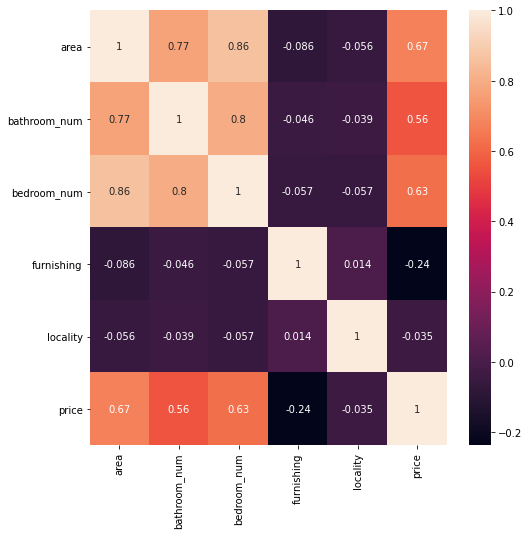

In [251]:
# Correlation between independent variables test #Fail since dependent variables are correlated with each other. 
plt.figure(figsize=(8,8)) 
sns.heatmap(df_new.corr(), annot=True)
plt.show()

In [252]:
y_predict = lr.predict(x_test)
y_predict_train = lr.predict(x_train)
print("Bias = ", r2_score(y_train, y_predict_train))
print("Variance = ", r2_score(y_test, y_predict))
# Variance should be less than bias if its not then there is need for regularization. 

Bias =  0.4977198454787046
Variance =  0.4949434156542656


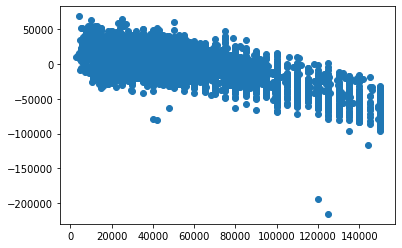

In [253]:
# The residuals are homoskedastial
residuals = y_predict - y_test
plt.scatter(y_test, residuals )
plt.show()

Skew of residuals =  -1.0487342787375256


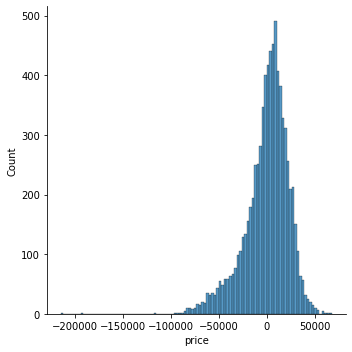

In [254]:
# Checking if residuals are normally distributed
print("Skew of residuals = ",skew(residuals))
sns.displot(residuals)
plt.show()

#Since residuals are not normally distributed this test also fails. 

In [255]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
x1 = df_new.drop(['price'], axis=1)
y1 = df_new['price']

x_trn, x_tst, y_trn, y_tst = train_test_split(x1,y1, test_size=0.25)

x_poly_trn2 = pf.fit_transform(x_trn)
x_poly_tst2 = pf.fit_transform(x_tst)

lr_poly2 = LinearRegression()
lr_poly2.fit(x_poly_trn2, y_trn)

y_pred_trn = lr_poly2.predict(x_poly_trn2)
y_pred_tst = lr_poly2.predict(x_poly_tst2)

print("Slope : {}\n Intercept : {}".format(lr_poly2.coef_,lr_poly2.intercept_))
print("r2_score : {}".format(lr_poly2.score(x_poly_tst2,y_tst)))

Slope : [ 0.00000000e+00 -1.78995887e+05 -8.83402155e+04  3.87066561e+04
  2.71539460e+04 -1.49462794e+02  1.63186341e+04  1.10815129e+04
 -7.49154943e+03 -6.74849620e+03  1.89534973e+01 -1.02438615e+03
  9.14481099e+03  4.37305940e+03 -8.34079685e+00  1.12577393e+02
  9.91592663e+02 -2.98080713e+00  1.55325885e+03 -8.27380285e-02
  4.92532529e-02]
 Intercept : 542591.7923864833
r2_score : 0.5403478540370463


In [256]:
residuals_poly = y_pred_tst - y_tst
bias = r2_score(y_trn, y_pred_trn)
variance = r2_score(y_tst, y_pred_tst)
print("Bias = {}\n Variance = {}".format(bias, variance))

Bias = 0.540056434667225
 Variance = 0.5403478540370463


Skew : -1.0487342787375256


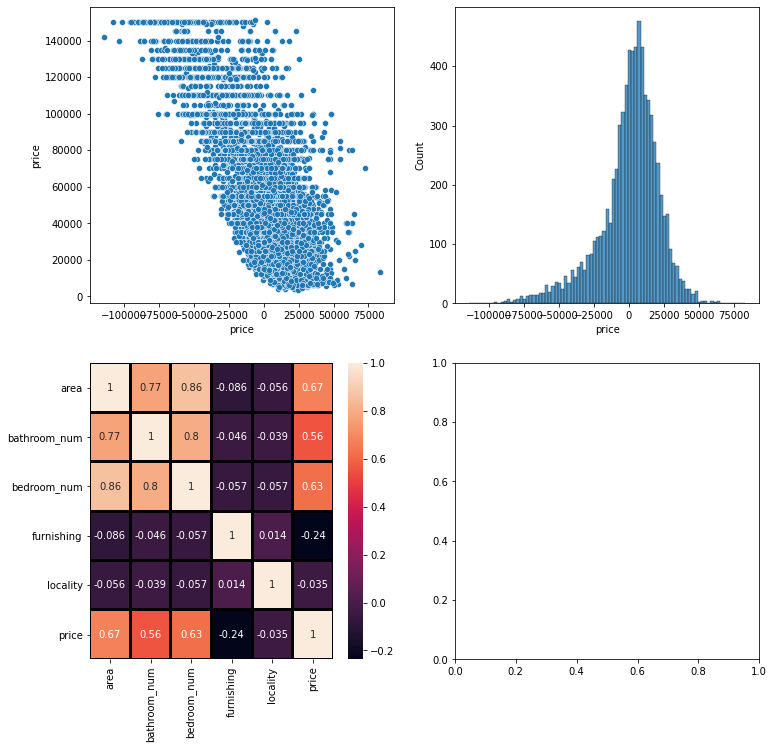

In [257]:
#Multi-correlation test failed
#Normal distribution test failed
#Homoskedatial pass
fig, axes = plt.subplots(2,2, figsize=(12,12))
print("Skew :",skew(residuals))
sns.heatmap(df_new.corr(), annot=True, linewidth=2, linecolor='black', ax=axes[1][0])
sns.histplot(residuals_poly, ax=axes[0][1])
sns.scatterplot(residuals_poly, y_tst, ax=axes[0][0])
plt.show()

In [258]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)
x1 = df_new.drop(['price'], axis=1)
y1 = df_new['price']

x_trn, x_tst, y_trn, y_tst = train_test_split(x1,y1, test_size=0.25)

x_poly_trn3 = pf.fit_transform(x_trn)
x_poly_tst3 = pf.fit_transform(x_tst)

lr_poly3 = LinearRegression()
lr_poly3.fit(x_poly_trn3, y_trn)

y_pred_trn3 = lr_poly3.predict(x_poly_trn3)
y_pred_tst3 = lr_poly3.predict(x_poly_tst3)

print("Slope : {}\n Intercept : {}".format(lr_poly3.coef_,lr_poly3.intercept_))
print("r2_score : {}".format(lr_poly3.score(x_poly_tst3,y_tst)))

residuals_poly3 = y_pred_tst3 - y_tst
bias_poly_3 = r2_score(y_trn, y_pred_trn3)
variance_poly_3 = r2_score(y_tst, y_pred_tst3)
print("Bias = {}\n Variance = {}".format(bias_poly_3, variance_poly_3))

Slope : [ 3.31686227e-01 -1.03742757e+03 -1.12126169e+06  9.22471643e+04
  7.30654833e+04  7.64868798e+02 -1.69851987e+04  1.91839070e+05
 -3.17766634e+04 -4.89952739e+04 -2.64822823e+02  3.48186674e+05
 -1.31795815e+05  7.93985015e+04  1.99760560e+02  6.79436386e+04
 -6.83520521e+03 -2.60290034e+01  4.77531575e+04  2.77573320e+00
 -1.04021531e-01  1.57985760e+03 -9.26796997e+03  2.72254398e+03
  5.75840882e+03  2.25000082e+01 -2.86981030e+04  2.10964223e+04
 -1.74522540e+04 -2.35369250e+01 -1.13488662e+04  1.43124386e+03
 -1.56787541e+00 -6.04865179e+03  8.09159152e-01  1.17042044e-02
 -4.48900972e+04  3.21442019e+04  1.62735716e+04 -2.80567515e+01
 -2.46443504e+04 -4.65051490e+03  2.55704906e+01  3.37458157e+03
 -6.81644615e+00 -1.41353574e-02  7.56505873e+03  9.99224896e+02
 -7.57006521e+00  3.06479690e+02  1.46941498e-01  3.63300514e-02
 -2.87102301e+03 -4.35502517e+00  1.22385134e-02  5.97395046e-06]
 Intercept : 474138.1516490876
r2_score : 0.538791760084711
Bias = 0.556795145631

**Decision Tree Regressor test**

In [259]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.svm import LinearSVR, SVR

1 0.34888803057196394
2 0.45403498555001165
3 0.5118180695498634
4 0.5390809420022643
5 0.5606654649025987
6 0.5875242326014023
7 0.6080278712429492
8 0.6281224489159799
9 0.64295021844789
10 0.6582174758214392
11 0.6831636935527109
12 0.6919420817479842
13 0.7076701658544975
14 0.7086319868645398


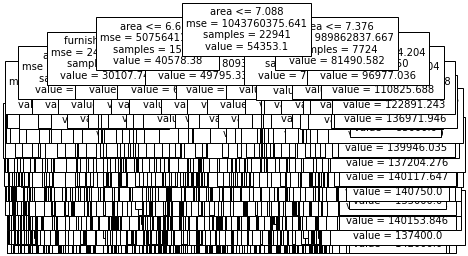

In [260]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.25)

for i in range(1,15):
  dtr = DecisionTreeRegressor(max_depth=i)
  dtr.fit(x_train1, y_train1)
  print(i, dtr.score(x_test1, y_test1))

  tree.plot_tree(dtr.fit(x_train1, y_train1), feature_names=list(df), fontsize=10)
# with max_depth as 6 we are getting the best results.

[Text(184.2293057762754, 210.192, 'area <= 7.088\nmse = 1043760375.641\nsamples = 22941\nvalue = 54353.1'),
 Text(94.41105694122717, 195.696, 'area <= 6.615\nmse = 507564113.238\nsamples = 15217\nvalue = 40578.38'),
 Text(45.24983342199537, 181.2, 'furnishing <= 0.5\nmse = 240332422.426\nsamples = 7124\nvalue = 30107.745'),
 Text(16.713058907504177, 166.704, 'area <= 6.148\nmse = 342067113.737\nsamples = 1648\nvalue = 39830.61'),
 Text(3.391308651618812, 152.208, 'area <= 3.223\nmse = 203589558.515\nsamples = 194\nvalue = 26283.031'),
 Text(1.5003595862737704, 137.712, 'bedroom_num <= 2.5\nmse = 506250000.0\nsamples = 2\nvalue = 97500.0'),
 Text(1.4282160749878792, 123.216, 'mse = 0.0\nsamples = 1\nvalue = 75000.0'),
 Text(1.5725030975596617, 123.216, 'mse = 0.0\nsamples = 1\nvalue = 120000.0'),
 Text(5.282257716963853, 137.712, 'area <= 5.934\nmse = 147054673.454\nsamples = 192\nvalue = 25541.188'),
 Text(1.7167901201314444, 123.216, 'area <= 5.533\nmse = 90266135.507\nsamples = 98\nv

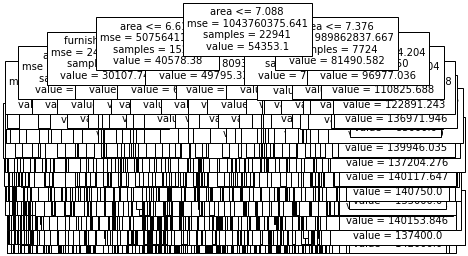

In [261]:
dt = DecisionTreeRegressor(splitter='best', max_depth=14, min_samples_split=2, min_samples_leaf=1)
dt.fit(x_train1, y_train1)
dt.score(x_test1, y_test1)
y_pred = dt.predict(x_test1)
tree.plot_tree(dtr.fit(x_train1, y_train1), feature_names=list(df), fontsize=10)

In [262]:
df_dt = pd.DataFrame({'Target original':y_test1,
                      'Target predicted':y_pred})
df_dt.head(10)

,Target original,Target predicted
9336,39000,37714.285714
11016,55000,55904.761905
11481,65000,55000.000000
6840,26000,24324.956522
27456,55000,75000.000000
24530,120000,93333.333333
23090,83000,55361.975460
22702,70000,62998.148148
10271,45000,36500.000000
20604,55000,52500.000000


In [263]:
df_new.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
0,5.857933,1.414214,1,2,425,9000
1,6.480045,1.414214,1,1,727,8060
2,6.453625,1.414214,1,1,753,8000
3,6.291569,1.414214,1,1,728,8000
4,6.437752,1.000000,1,0,487,9000


In [264]:
df_dt_ip = pd.DataFrame({'Area_of_flat':input("Enter the area of the flat : "),
                         'Bedroom_num' : input("Enter the number of bedrooms : "),
                         'Bathroom_num' : input("Enter the number of bathrooms : "),
                         'Furnishing' : input("Enter the type of furnishing : "),
                         'Locality' : input("Enter the locality code : ")# 0 : Unfurnished, 1 : Semi-furnished, 2 : Furnished
                         }, index=range(1))

Enter the area of the flat : 1250
Enter the number of bedrooms : 2
Enter the number of bathrooms : 2
Enter the type of furnishing : 1
Enter the locality code : 487


In [274]:
dt.predict(df_dt_ip)
# This shall be our final model since it is giving us the most accurate prediction. 

array([80000.])

**Support Vector Regressor (SVR)**

In [266]:
svr = LinearSVR()  #Kernel - Linear, Hard margin
svr.fit(x_train1, y_train1)
print("SVR Linear :", svr.score(x_test1, y_test1))

SVR Linear : 0.2546182192022345


In [267]:
svr = SVR(kernel='poly', degree=3, C=5)  #Kernel - Poly  degree = 3, Soft margin = C
svr.fit(x_train1, y_train1)
print("SVR Polynomial(3) :", svr.score(x_test1, y_test1))

SVR Polynomial(3) : -0.05690242211422003


In [268]:
svr = SVR(kernel='poly', degree=2, C=3)  #Kernel - Poly  degree = 2, Soft margin = C
svr.fit(x_train1, y_train1)
print("SVR Polynomial(3) :", svr.score(x_test1, y_test1))

SVR Polynomial(3) : -0.05658103408353754


In [269]:
svr = SVR(kernel='rbf', C=6)  #Kernel - Radial, Soft margin
svr.fit(x_train1, y_train1)
print("SVR Radial :", svr.score(x_test1, y_test1))

SVR Radial : -0.05052247657744946
